# Импорт библиотек

In [49]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [3]:
from ipymarkup import show_dep_ascii_markup as show_markup
from razdel import sentenize, tokenize
from navec import Navec
from slovnet import Syntax

In [4]:
import networkx as nx

# Подгрузка файлов, нужных для slovnet

In [5]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
syntax = Syntax.load('slovnet_syntax_news_v1.tar')
syntax.navec(navec)

Syntax(
    infer=SyntaxInfer(
        model=Syntax(
            emb=WordShapeEmbedding(
                word=NavecEmbedding(
                    id='news_v1_1B_250K_300d_100q',
                    indexes=Weight(
                        shape=[250002,
                         100],
                        dtype='uint8',
                        array=array([[176, 222, 248, ..., 244, 183, 191],
                               [215, 200, 168, ..., 120, 217,  21],
                               [ 83, 174,  54, ..., 106,  88, 251],
                               ...,
                               [133, 125, 123, ..., 124,  94,  24],
                               [183,  49, 180, ..., 151, 167,  68],
                               [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
                    ),
                    codes=Weight(
                        shape=[100,
                         256,
                         3],
                        dtype='float32',
                    

# Задаем текст-пример

In [6]:
text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '

# Импорт текстов про губернатора Смоленской области

In [7]:
df = pd.read_excel('смоленск_главная_роль_разметка.xlsx', index_col = 0)

In [8]:
df

,№,Дата,Тип,Заголовок,Сообщение,Автораспознанный текст,Площадка,Тип площадки,Ссылка,Автор,...,Объявления,Категории,Токсичность,Статус на площадке,Избранное,Мнения,Объекты,Теги,FIND,ВДЛ в главной роли
0,1,16.08.2023 19:03,Пост,NaN,В Смоленской области пенсионер возмутился из-з...,NaN,Telegram,Мессенджер,https://telegram.me/redakciya_channel/23138,Пивоваров (Редакция),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Анохина'],0
1,2,08.08.2023 06:20,Пост,NaN,⚡️Около 12 тысяч жителей Смоленской области ос...,NaN,Telegram,Мессенджер,https://telegram.me/c/1754252633/70230,Топор Live,...,NaN,Объявления ЖКХ,NaN,NaN,NaN,NaN,NaN,NaN,['Василий Анохин'],1
2,3,08.07.2023 09:54,Пост,NaN,Василий Анохин с семьёй обратился к смолянам в...,Тексты с изображений _x000d_\ni сvо cay_x000d_\n,ВКонтакте,Соцсеть,http://vk.com/wall-153855784_1634183,Подслушано Смоленск,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Василий Анохин'],1
3,4,02.06.2023 12:40,Пост,⚡️НОВОСТИ | ПРИГОЖИН «МОЧИТ» КАДЫРОВА | РДК РВ...,Кадыровцы выступили против Евгения Пригожина. ...,Тексты с изображений _x000d_\nновости 02 06 23...,YouTube,Блог,http://www.youtube.com/watch?v=pYgLd0zUmqU,Ходорковский LIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0
4,5,17.08.2023 18:02,Пост,NaN,"Депутата Смоленского горсовета, кандидата в об...",NaN,Telegram,Мессенджер,https://telegram.me/aavst2022/5922,aavst2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Анохина'],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2152,17.08.2023 13:26,Пост,NaN,📚 Школы Ярцевского района ремонтируют в рамках...,Тексты с изображений _x000d_\nbe #ela_x000d_\n,ВКонтакте,Соцсеть,http://vk.com/wall-97489771_285367,Подслушано в Ярцево,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Василий Анохин'],1
29049,29050,28.06.2023 13:03,Пост,NaN,Василий Анохин проконтролировал ход благоустро...,NaN,Telegram,Мессенджер,https://telegram.me/smoland67/16943,Smolland | Смоленск,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Василий Анохин'],1
7737,7738,28.07.2023 15:18,Репост,27.07.2023. Рославль. ГДК. Часть 1. Встреча и.о.,27.07.2023. Рославль. ГДК. Часть 1. Встреча и....,NaN,Одноклассники,Соцсеть,http://ok.ru/profile/537165385186/statuses/155...,Ирина Трабурова (Гетманец),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Анохина'],0
15806,15807,16.06.2023 20:46,Пост,▶ Фонд президентских грантов определил победит...,▶ Фонд президентских грантов определил победит...,NaN,Дзен,Блог,https://dzen.ru/b/ZIwWRNy0xWywo6pW,МИНИСТЕРСТВО СОЦИАЛЬНОЙ ЗАЩИТЫ АЛТАЙСКОГО КРАЯ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0


# Создам функцию, которая делает обработку всех текстов с помощью natasha, slovnet и networkx

In [9]:
def prediction(text: str, metric_func='degree'):
    
    # Инициализация компонентов Natasha
    segmenter = Segmenter()
    morph_vocab = MorphVocab()
    emb = NewsEmbedding()
    morph_tagger = NewsMorphTagger(emb)
    ner_tagger = NewsNERTagger(emb)
    names_extractor = NamesExtractor(morph_vocab)
    
    # Создаем объект Doc с текстом
    doc = Doc(text)

    # Анализ текста
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.tag_ner(ner_tagger)
    
    # Лемматизируем список с помощью Наташи
    for span in doc.spans:
        span.normalize(morph_vocab)
    
    NE_list = []
    for span in doc.spans:
        NE_list.append(span.normal)
    
    # Фильтруем список
    NE_list = list(set(NE_list))
    filtered_spisok = []

    for i, k in enumerate(NE_list):
        punctured_NE_list = NE_list[:i] + NE_list[i + 1:]
        bool_include = [k in ne for ne in punctured_NE_list]
        if not any(bool_include) and (k not in filtered_spisok):
            filtered_spisok.append(k)
    
    match_dict = dict()
    # соответствие полных и неполных форм именованных сущностей
    for i in NE_list:
        for j in filtered_spisok:
            if i in j:
                match_dict[i] = j
    # соответствие токенов и именованных сущностей
    token_dict = {filtered_spisok[i]: f'токен_{i + 1}' for i in range(len(filtered_spisok))}
    final_token_dict = {i: token_dict[match_dict[i]] for i in NE_list}
    
    # Лемматищация
    dict_lemm = {span.text: span.normal for span in doc.spans}
    for old_form, norm_form in dict_lemm.items():
        text = text.replace(old_form, norm_form)
        
    # Замена токенами
    for old_token, new_token in token_dict.items():
        text = text.replace(old_token, new_token)
    for old_token, new_token in final_token_dict.items():
        text = text.replace(old_token, new_token)
        
    chunk = []
    for sent in sentenize(text):
        tokens = [_.text for _ in tokenize(sent.text)]
        chunk.append(tokens)
    
    # Синтаксический анализ
    words_deps_list = []
    for markup in syntax.map(chunk):
        words, deps = [], []
        for token in markup.tokens:
            words.append(token.text)
            source = int(token.head_id) - 1
            target = int(token.id) - 1
            if source > 0 and source != target:
                deps.append([source, target, token.rel])
        words_deps_list.append((words, deps))
    
    cols = list(set(final_token_dict.values()))
    df = pd.DataFrame(columns = cols)
    for words, deps in words_deps_list:
        # Создаем пустой граф
        G = nx.Graph()

        # Проходим по списку зависимостей и добавляем ребра в граф
        for source, target, rel in deps:
            G.add_edge(words[source], words[target], rel=rel)

        # Получаем метрики для узлов графа
        if metric_func == 'degree':
            metric = dict(G.degree)
        else:
            metric = metric_func(G)

        # Сравниваем токены (NE) по степеням
        tokens_numb = dict(keys=list(final_token_dict.values()))
        for word, degree in metric.items():
            if 'токен_' in word:
                tokens_numb[word] = [degree]
        df_interm = pd.DataFrame(tokens_numb, columns=cols)

        df = pd.concat([df, df_interm])
        
    df = df.fillna(0)
    
    tokens_numb = df.sum()
    
    try:
        tokens_ind = tokens_numb[tokens_numb == max(tokens_numb)].index
    except ValueError:
        return ''

    tokens_position = []

    for i in tokens_ind:
        position = text.find(i)
        tokens_position.append((i, position))

    token_result = min(tokens_position, key= lambda x: x[1])[0]

    inverted_token_dict = {value: key for key, value in token_dict.items()}

    main_role = inverted_token_dict[token_result]
    
    return main_role

# Применим функцию

In [10]:
%%time
df['Главная роль'] = df.apply(lambda x: prediction(x['Сообщение']), axis=1) 

CPU times: total: 11min 42s
Wall time: 5min 11s


# Приводим столбцы к виду

In [22]:
df['pred_target'] = df.apply(lambda x: 'анохин' in x['Главная роль'].lower(), axis=1)

In [33]:
df['ВДЛ в главной роли'] = df['ВДЛ в главной роли'].astype(bool)

# Проверка точности (accuracy)

In [34]:
accuracy_score(df['ВДЛ в главной роли'], df['pred_target'])

0.6510067114093959

In [41]:
precision_score(df['ВДЛ в главной роли'], df['pred_target'])

0.875

In [42]:
recall_score(df['ВДЛ в главной роли'], df['pred_target'])

0.3

In [43]:
df['ВДЛ в главной роли'].value_counts()

False    158
True     140
Name: ВДЛ в главной роли, dtype: int64

In [50]:
conf_matr = confusion_matrix(df['ВДЛ в главной роли'], df['pred_target'])

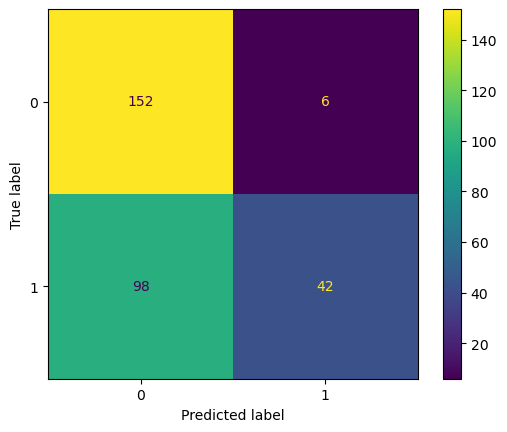

In [52]:
disp = ConfusionMatrixDisplay(conf_matr)
disp.plot()
plt.show()

Проблема: если выделяется NE, то оно мб неправильно нормализовано

Задачи на 19_09_2023:
1. Сделать для всех предложений +
2. Проверка на 300 примерах (почти сделал)

Идеи:
1. Разметка с помощью ГПТ, построение множества фичей, захуярить в катбуст
2. Найти ГПТ модель на гитхабе или хагинг фейс
3. Эвристика: учитывать только первое предложение для графовых методов (предполагаем, что именно в нем будет слово/фраза, обозначающая главную роль)
4. Фича: часть речи первого появления

Моменты:
1. Учитывать ли суффиксы (мб как фичу)
2. Допустим, в следующем предложениии упоминается персонаж из прошлого, но употребляется местоимение, а не имя. Как в таком случае поступить? (эта задача называется референцированием местоимений)
3. Если приведена цитата персонажа, это можно учитывать как фичу, но непонятно, как учитывать цитату

Что сделать: (вылизать для графового метода)
1. Поработать с лемматизацией, учитывать ее, чтобы синтаксический анализ был более корректным
2. Кореферентность местоимений
3. spelling
4. Посмотреть вручную графы плохих примеров
5. Разобраться, как строить ребра (можно ориентированно, а можно нет)
6. Замена именованных сущностей, которые по сути одинаковые, например В В Путин и Владимир Владимирович, президент будут разными методами (разобраться)
7. Перевод всего текста в граф (подумать, как решить разрывность графов)
8. Как агрегировать метрики из разных предложений?